In [17]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from scipy import stats as st

In [18]:
df = pd.read_csv('../../dataset-normalized.csv')
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,True,1,1102,0,1,2,Life Sciences,2,Female,...,3,1,0,8,0,1,6,4,0,5
1,49,False,2,279,1,8,1,Life Sciences,3,Male,...,4,4,1,10,3,3,10,7,1,7
2,37,True,1,1373,1,2,2,Other,4,Male,...,3,2,0,7,3,3,0,0,0,0
3,33,False,2,1392,1,3,4,Life Sciences,4,Female,...,3,3,0,8,3,3,8,7,3,0
4,27,False,1,591,1,2,1,Medical,1,Male,...,3,4,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,False,2,884,1,23,2,Medical,3,Male,...,3,3,1,17,3,3,5,2,0,3
1466,39,False,1,613,1,6,1,Medical,4,Male,...,3,1,1,9,5,3,7,7,1,7
1467,27,False,1,155,1,4,3,Life Sciences,2,Male,...,4,2,1,6,0,3,6,2,0,3
1468,49,False,2,1023,0,2,3,Medical,4,Male,...,3,4,0,17,3,2,9,6,0,8


In [19]:
job_roles_dict = dict(df.JobRole.value_counts())
job_roles_dict

{'Sales Executive': 326,
 'Research Scientist': 292,
 'Laboratory Technician': 259,
 'Manufacturing Director': 145,
 'Healthcare Representative': 131,
 'Manager': 102,
 'Sales Representative': 83,
 'Research Director': 80,
 'Human Resources': 52}

In [20]:
job_levels_dict = dict(df.JobLevel.value_counts())
job_levels_dict

{1: 543, 2: 534, 3: 218, 4: 106, 5: 69}

In [21]:
job_roles = list(job_roles_dict.keys())
job_roles

['Sales Executive',
 'Research Scientist',
 'Laboratory Technician',
 'Manufacturing Director',
 'Healthcare Representative',
 'Manager',
 'Sales Representative',
 'Research Director',
 'Human Resources']

In [22]:
job_levels = list(job_levels_dict.keys())
job_levels

[1, 2, 3, 4, 5]

In [23]:
for role in job_roles:
    vc = df[df['JobRole'] == role]['JobLevel'].value_counts()
    print(f'Number of people working as a {role} with each job level: \n{vc}')

Number of people working as a Sales Executive with each job level: 
2    233
3     79
4     14
Name: JobLevel, dtype: int64
Number of people working as a Research Scientist with each job level: 
1    234
2     57
3      1
Name: JobLevel, dtype: int64
Number of people working as a Laboratory Technician with each job level: 
1    200
2     56
3      3
Name: JobLevel, dtype: int64
Number of people working as a Manufacturing Director with each job level: 
2    90
3    45
4    10
Name: JobLevel, dtype: int64
Number of people working as a Healthcare Representative with each job level: 
2    78
3    44
4     9
Name: JobLevel, dtype: int64
Number of people working as a Manager with each job level: 
4    47
5    43
3    12
Name: JobLevel, dtype: int64
Number of people working as a Sales Representative with each job level: 
1    76
2     7
Name: JobLevel, dtype: int64
Number of people working as a Research Director with each job level: 
3    28
4    26
5    26
Name: JobLevel, dtype: int64
Number

In [24]:
def plot_salary(s: int, job_role: str, job_lvl: int):
    
    job_dict = dict(df[(df['JobRole'] == job_role) & (df['JobLevel'] == job_lvl)]['MonthlyIncome'].describe())
    df1 = df[(df['JobRole'] == job_role) & (df['JobLevel'] == job_lvl)]
    
    income_col = df1['MonthlyIncome']
    
#     informacja o tym, jaki % pracownikow zarabia mniej/wiecej na danym stanowisku, z danym job level
    
    employees = job_dict['count']
    less = df1[(income_col < s)]['MonthlyIncome'].count()
    more = df1[(income_col > s)]['MonthlyIncome'].count()
    less_p = round(100 * less / employees, 2)
    more_p = round(100 * more / employees, 2)
    
    variation = st.variation(df1['MonthlyIncome'])
    
#     wykres jak wypadasz w kwartylu, w ktorym miesci sie dana pensja
    
    if variation > 0.15 and job_dict['count'] >= 24:
        
        if s <= job_dict['25%']:
            s_range = df1[(income_col <= job_dict['25%'])]
            plot_title = 'Your salary compared to first quartile.'
        elif s <= job_dict['50%']:
            s_range = df1[(income_col <= job_dict['50%']) & (income_col > job_dict['25%'])]
            plot_title = 'Your salary compared to second quartile.'
        elif s <= job_dict['75%']:
            s_range = df1[(income_col <= job_dict['75%']) & (income_col > job_dict['50%'])]
            plot_title = 'Your salary compared to third quartile.'
        else:
            s_range = df1[(income_col > job_dict['75%'])]
            plot_title = 'Your salary compared to fourth quartile.'
        
        plt.subplots(figsize=(8, 12))
        
        plt.subplot(211)
        sns.set_style('whitegrid')
        sns.histplot(data=s_range['MonthlyIncome'], bins=10, kde=True)
        plt.axvline(x=s, color='r', linestyle='-', linewidth=2)
        plt.title(plot_title)
        
#         wykres jak wypadasz na tle wszystkich na tym stanowisku, o takim job level
        
        plt.subplot(212)
        sns.set_style('whitegrid')
        gen_title = 'Your salary compared to all of the employees on your position at your level.'
        sns.histplot(data=income_col, bins=10, kde=True)
        plt.axvline(x=s, color='r', linestyle='-', linewidth=2)
        plt.title(gen_title)
        
#     w przypadku zbyt malej ilosci danych, aby podzielic na kwartyle
#     wykres jak wypadasz na tle wszystkich na danym stanowisku (z pominieciem job level)
    
    else:
        print(f'Not enough employees in database to plot a comparison. Comparing now to all of the employees working as a {job_role}.')
        
        gen_sal = df[(df['JobRole'] == job_role)]['MonthlyIncome']
        gen_title = 'Your salary compared to all of the employees on your position.'
        
        plt.figure(figsize=(8, 6))
        sns.set_style('whitegrid')
        sns.histplot(data=gen_sal, bins=10, kde=True)
        plt.axvline(x=s, color='r', linestyle='-', linewidth=2)
        plt.title(gen_title)
    
    
    plt.show()
    print(f'{less_p}% people working as a {job_role} on job level {job_lvl} earns less than you, {more_p}% of them earns more.')

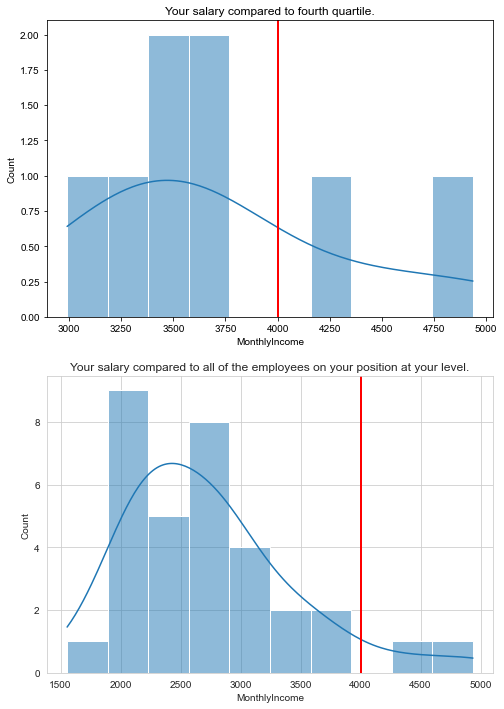

93.94% people working as a Human Resources on job level 1 earns less than you, 6.06% of them earns more.


In [25]:
plot_salary(4000, 'Human Resources', 1)

Not enough employees in database to plot a comparison. Comparing now to all of the employees working as a Human Resources.


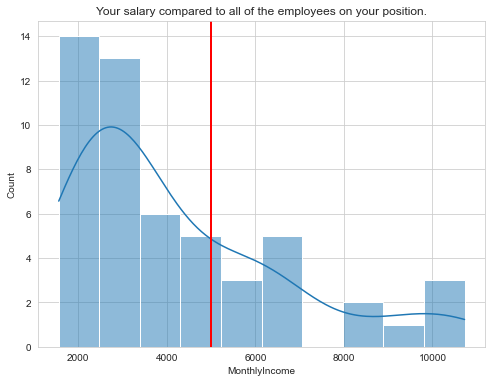

0.0% people working as a Human Resources on job level 3 earns less than you, 100.0% of them earns more.


In [26]:
plot_salary(5000, 'Human Resources', 3)

In [27]:
def plot_salary_vs_age(s: int, job_role: str, age=None):
    
#     wykres jak wypada dana pensja w danym przedziale wiekowym

    df1 = df[df['JobRole'] == job_role]
    age_col = df1['Age']
    age_dict = dict(age_col.describe())
    q25 = age_dict['25%']
    q50 = age_dict['50%']
    q75 = age_dict['75%']

    if (age != None) & (isinstance(age, int)):
        
        if age < 18:
            print('Please enter valid age - at least 18 y.o.')
            return
        elif age <= q25:
            s_range = df1[age_col <= q25]
            plot_title = f'Your salary compared to employees up to {round(q25)} y.o.'
        elif age <= age_dict['50%']:
            s_range = df1[(age_col <= q50) & (age_col > q25)]
            plot_title = f'Your salary compared to employees between {round(q25)} and {round(q50)} y.o.'
        elif age <= age_dict['75%']:
            s_range = df1[(age_col <= q75) & (age_col > q50)]
            plot_title = f'Your salary compared to employees between {round(q50)} and {round(q75)} y.o.'
        else:
            s_range = df1[age_col > q75]
            plot_title = f'Your salary compared to employees over {round(q75)} y.o.'
        
#         informacja o tym, jaki % pracownikow w danej grupie wiekowej zarabia mniej, a jaki % więcej
        
        income = s_range['MonthlyIncome']
        employees = income.count()
        less = s_range[income < s]['MonthlyIncome'].count()
        more = s_range[income > s]['MonthlyIncome'].count()
        less_p = round(100 * less / employees, 2)
        more_p = round(100 * more / employees, 2)
        
        plt.figure(figsize=(8, 6))
        sns.set_style('whitegrid')
        sns.histplot(data=s_range['MonthlyIncome'], bins=10, kde=True)
        plt.axvline(x=s, color='r', linestyle='-', linewidth=2)
        plt.title(plot_title)
                
        plt.show()
        print(f'{less_p}% people working as a {job_role} in your age group earns less than you, {more_p}% of them earns more.')
    
#     jeśli nie podasz wieku ---> wykres zaleznosci pensji od wieku na danym stanowisku
    
    else:
        s_range = df1[['Age', 'MonthlyIncome']].groupby(by='Age').mean().reset_index()
        x = s_range['Age']
        y = s_range['MonthlyIncome']

        plt.figure(figsize=(8, 6))
        
        sns.set_style('whitegrid')
        plt.plot(x, y, marker='o')
        plt.axhline(y=s, color='r', linestyle='-', linewidth=2)
        plt.title(f'Salary depending on age. Job role: {job_role}.')
        plt.show()

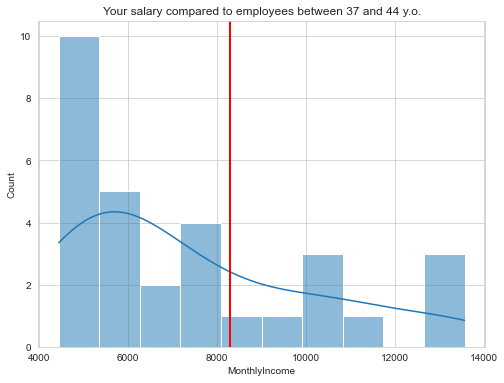

70.0% people working as a Manufacturing Director in your age group earns less than you, 30.0% of them earns more.


In [28]:
plot_salary_vs_age(8300, 'Manufacturing Director', 43)

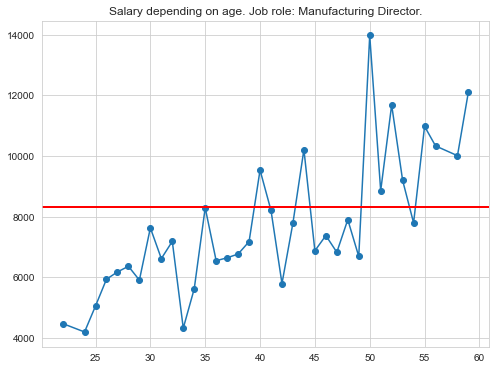

In [29]:
plot_salary_vs_age(8300, 'Manufacturing Director', 'hghghg')

In [30]:
def plot_salary_vs_gender(s: int, job_role: str, gender=None):
    
#     wykres jak wypada podana pensja na tle pracownikow tej samej plci

    df1 = df[df['JobRole'] == job_role]
    gender_col = df1['Gender']
    
    if gender in ['Male', 'Female']:
        
        if gender == 'Male':
            s_range = df1[gender_col == 'Male']
            plot_title = f'Your salary compared to male employees working as a {job_role}.'
        else:
            s_range = df1[gender_col == 'Female']
            plot_title = f'Your salary compared to female employees working as a {job_role}.'
        
#         informacja o tym, jaki % pracownikow o podanej plci zarabia mniej, a jaki % więcej
        
        income = s_range['MonthlyIncome']
        employees = income.count()
        less = s_range[income < s]['MonthlyIncome'].count()
        more = s_range[income > s]['MonthlyIncome'].count()
        less_p = round(100 * less / employees, 2)
        more_p = round(100 * more / employees, 2)
        
        axs = plt.subplots(figsize=(8, 12))
        
        ax1 = plt.subplot(211)
        sns.set_style('whitegrid')
        sns.histplot(data=s_range['MonthlyIncome'], bins=10, kde=True)
        plt.axvline(x=s, color='r', linestyle='-', linewidth=2)
        plt.title(plot_title)
        
        ax2 = plt.subplot(212)
        sns.set_style('whitegrid')
        sns.boxplot(data=df1, x='MonthlyIncome', y='Gender', orient='h', palette='seismic')
        sns.swarmplot(data=df1, x='MonthlyIncome', y='Gender', orient='h', color='dimgray')
        plt.axvline(x=s, color='r', linestyle='-', linewidth=2)
        plt.title(f'Salary distribution depending on gender. Job role: {job_role}.')
        
        plt.show()
        print(f'{less_p}% {gender} employees working as a {job_role} less than you, {more_p}% of them earns more.')
    
#     jeśli nie podasz plci ---> rozklad dla obu plci
    
    else:
        
        plt.figure(figsize=(8, 6))
        sns.set_style('whitegrid')
        sns.boxplot(data=df1, x='MonthlyIncome', y='Gender', orient='h', palette='seismic')
        sns.swarmplot(data=df1, x='MonthlyIncome', y='Gender', orient='h', color='dimgray')
        plt.axvline(x=s, color='r', linestyle='-', linewidth=2)
        plt.title(f'Salary distribution depending on gender. Job role: {job_role}.')

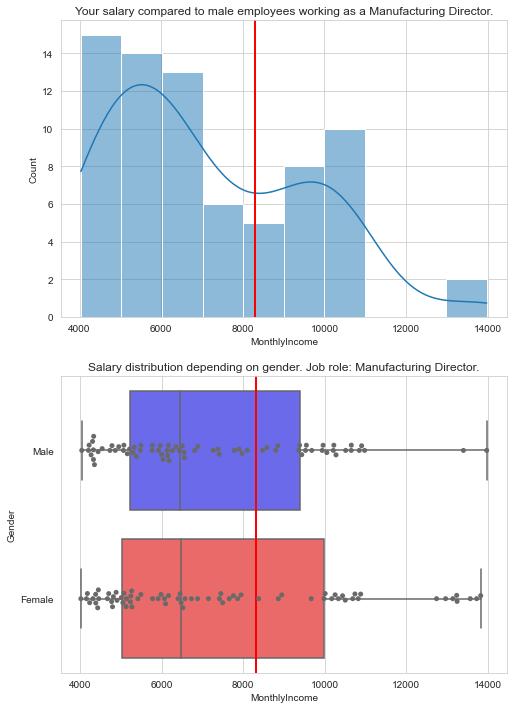

67.12% Male employees working as a Manufacturing Director less than you, 32.88% of them earns more.


In [31]:
plot_salary_vs_gender(8300, 'Manufacturing Director', 'Male')

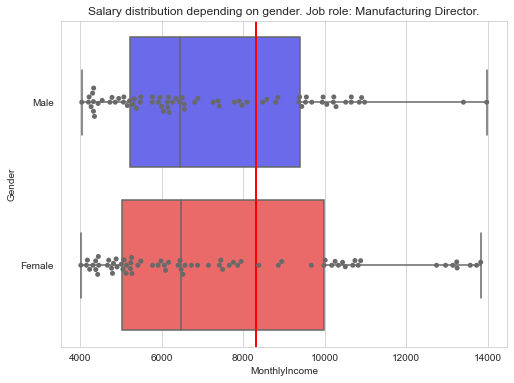

In [32]:
plot_salary_vs_gender(8300, 'Manufacturing Director')